In [1]:
# Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import layers
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
# File Management Libraries and Helper Functions
import os
from pathlib import Path
import glob
import pickle

from breed_helpers import *

In [3]:
# Object anda Data Structure Management Libraries
from PIL import Image
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/breeds.csv')

bbox_list = list()

if(bbox_list != None):
    for i in range(len(df)):
        str = df.at[i, 'Bbox']
        bbox_list.append(str_to_tuple(str))

    df.drop(labels=['Bbox'], axis='columns', inplace=True)
    df.insert(3, 'Bbox', bbox_list)

df.head()

,Breed,Folder_Dir,Image_Dir,Bbox,x1,y1,x2,y2,Image_Path
0,Chihuahua,n02085620,n02085620_10074,"(25, 10, 276, 498)",25,10,276,498,data/Images/n02085620-Chihuahua/n02085620_1007...
1,Chihuahua,n02085620,n02085620_10131,"(49, 9, 393, 493)",49,9,393,493,data/Images/n02085620-Chihuahua/n02085620_1013...
2,Chihuahua,n02085620,n02085620_10621,"(142, 43, 335, 250)",142,43,335,250,data/Images/n02085620-Chihuahua/n02085620_1062...
3,Chihuahua,n02085620,n02085620_1073,"(0, 27, 312, 498)",0,27,312,498,data/Images/n02085620-Chihuahua/n02085620_1073...
4,Chihuahua,n02085620,n02085620_10976,"(90, 104, 242, 452)",90,104,242,452,data/Images/n02085620-Chihuahua/n02085620_1097...


### Preprocessing

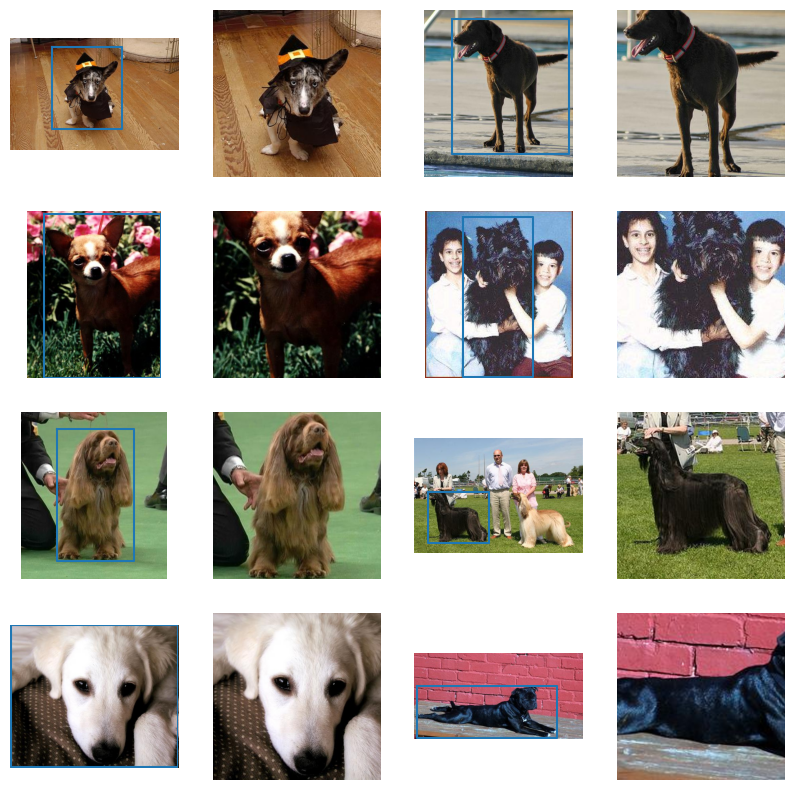

In [7]:
plt.figure(figsize=(10, 10))
k = 0
bbox = (1, 1, 2, 2)

for i in range(16):
    plt.subplot(4, 4, i+1)
  
    # Selecting a random image
    # index from the dataframe.
    if(i%2 == 0):
        k = np.random.randint(0, len(df))
        #k = i
        bbox = df.loc[k, 'Bbox']

        img = Image.open(df.loc[k, 'Image_Path'])
        plt.imshow(img)

        #for j in range(len(bbox)):
        xmin, ymin, xmax, ymax = bbox
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin]) # showing border

        #plt.title(df.loc[k, 'Breed'])
        plt.axis('off')
    else:
        img = Image.open(df.loc[k, 'Image_Path'])
        img = crop_image(img, bbox, size = 299, verbose = 0)
        plt.imshow(img)

        #plt.title(df.loc[k, 'Breed'])
        plt.axis('off')
plt.show()

### Test Train Split

In [ ]:
with open('data/shuffled_smart_resized_299_images.pickle', 'rb') as file:
    X, y = pickle.load(file).values()

In [ ]:
print(f'X size:{np.shape(X)}, y size:{np.shape(y)}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test, random_state = 1)
print("X train, test, val: ", len(X_train), len(X_test), len(X_val))
print("y train, test, val: ", len(y_train), len(y_test), len(y_val))

#y_train, y_val = np.eye(num_classes)[np.asarray(y_train).reshape(-1)], np.eye(num_classes)[np.asarray(y_val).reshape(-1)]

### Input Pipeline